In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mcp_persor import BVHparser
import japanize_matplotlib

In [6]:
BVH_FILE = "../data/input/4/motion.bvh"
BVH_CHANNELS = {
    "POSITION": ["Xposition", "Yposition", "Zposition"],
    "ROTATION": ["Zrotation", "Xrotation", "Yrotation"],
    "ALL": [
        "Xposition",
        "Yposition",
        "Zposition",
        "Zrotation",
        "Xrotation",
        "Yrotation",
    ],
}

In [7]:
def plot(
    df: pd.DataFrame,
    x: str,
    heads: list[str],
    title: str,
    xlabel,
    ylabel,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color="k", linestyle="dotted", linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])

    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[x], df[head], label=head)

    plt.legend()
    plt.show()


In [8]:
bvhp = BVHparser(BVH_FILE)
bvhp.get_joints()

dict_keys(['root', 'torso_1', 'torso_2', 'torso_3', 'torso_4', 'torso_5', 'torso_6', 'torso_7', 'neck_1', 'neck_2', 'head', '_End_head', 'l_shoulder', 'l_up_arm', 'l_low_arm', 'l_hand', '_End_l_hand', 'r_shoulder', 'r_up_arm', 'r_low_arm', 'r_hand', '_End_r_hand', 'l_up_leg', 'l_low_leg', 'l_foot', 'l_toes', '_End_l_toes', 'r_up_leg', 'r_low_leg', 'r_foot', 'r_toes', '_End_r_toes'])

['l_up_arm_Zrotation', 'l_up_arm_Xrotation', 'l_up_arm_Yrotation', 'r_up_arm_Zrotation', 'r_up_arm_Xrotation', 'r_up_arm_Yrotation']


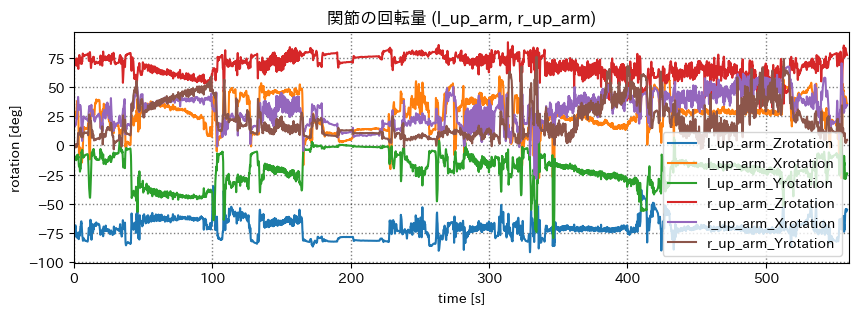

In [14]:
xlim = (0, 560)
ylim = (0, 0)

all_joints = bvhp.get_joints()
joints = [j for j in all_joints if "up_arm" in j and not j.startswith("_")]
heads = [f"{j}_{c}" for j in joints for c in BVH_CHANNELS["ROTATION"]]
print(heads)

plot(
    df=bvhp.get_motion_df(),
    x="time",
    heads=heads,
    title=f"関節の回転量 ({', '.join(joints)})",
    xlabel="time [s]",
    ylabel="rotation [deg]",
    xlim=xlim,
    ylim=ylim,
    grid=True,
)